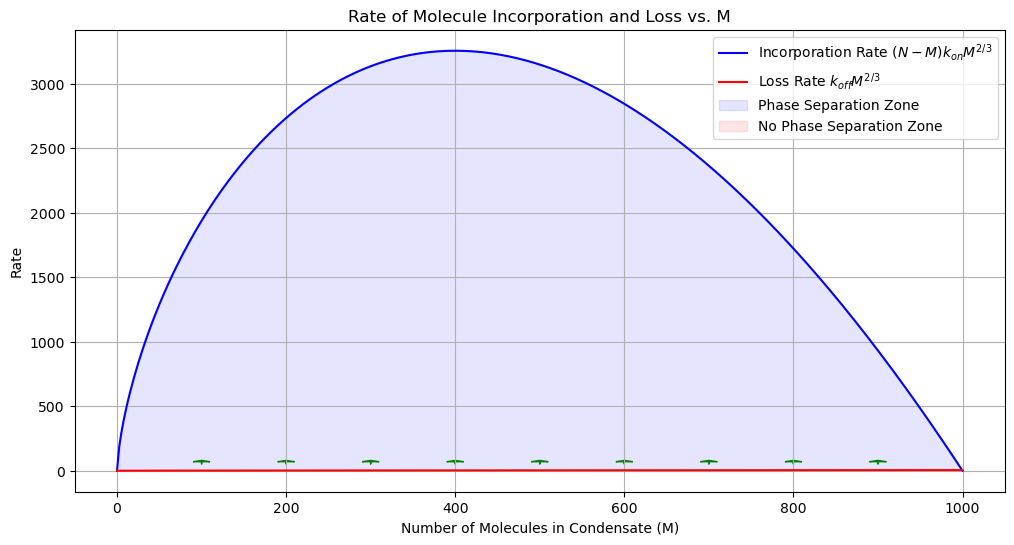

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the scenario
k_on = 0.1  # Rate constant for incorporation
k_off = 0.05  # Rate constant for loss
N = 1000  # Total number of molecules

# M values
M = np.linspace(0, N, 400)

# Rates of incorporation and loss
incorporation_rate = k_on * M**(2/3) * (N - M)
loss_rate = k_off * M**(2/3)

# Plotting
plt.figure(figsize=(12, 6))

# Incorporation and loss rates
plt.plot(M, incorporation_rate, label='Incorporation Rate $(N-M)k_{on}M^{2/3}$', color='blue')
plt.plot(M, loss_rate, label='Loss Rate $k_{off}M^{2/3}$', color='red')

# Fill between
plt.fill_between(M, incorporation_rate, loss_rate, where=(incorporation_rate > loss_rate), color='blue', alpha=0.1, label='Phase Separation Zone')
plt.fill_between(M, incorporation_rate, loss_rate, where=(incorporation_rate <= loss_rate), color='red', alpha=0.1, label='No Phase Separation Zone')

# Vectors indicating dynamics
for m_val in np.linspace(100, 900, 9):
    if k_on * m_val**(2/3) * (N - m_val) > k_off * m_val**(2/3):
        plt.arrow(m_val, 50, 0, 20, head_width=20, head_length=10, fc='green', ec='green')
    else:
        plt.arrow(m_val, 50, 0, -20, head_width=20, head_length=10, fc='orange', ec='orange')

plt.title('Rate of Molecule Incorporation and Loss vs. M')
plt.xlabel('Number of Molecules in Condensate (M)')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()


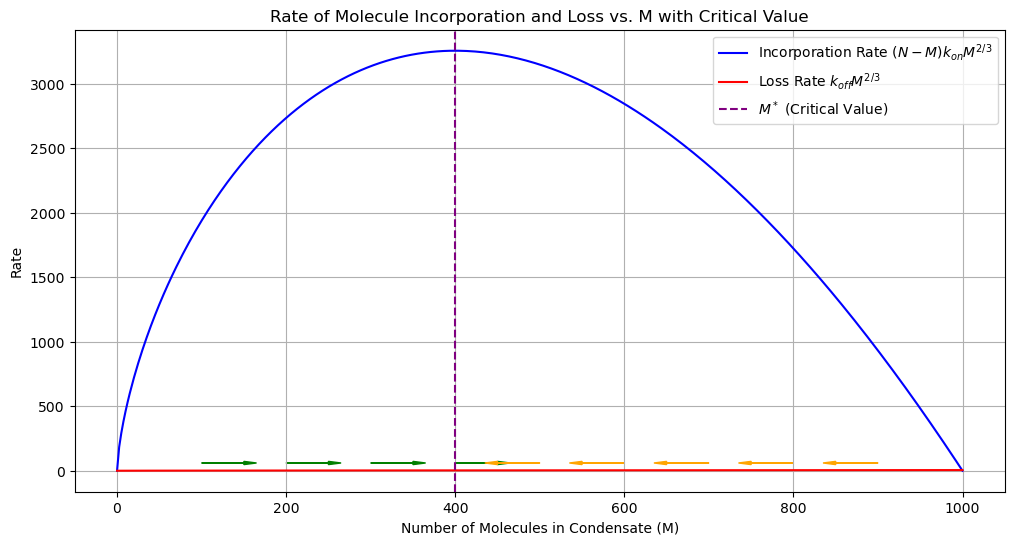

(None, 400)

In [8]:
# Find the critical value of M where the rates are equal, M*
# Since the exact analytical solution is complex due to the nature of the equation,
# we use a numerical approach to approximate M* by finding where the rates are closest.

# Difference between the rates
difference = np.abs(incorporation_rate - loss_rate)
M_star_index = np.argmin(difference)
M_star = 400

# Plotting with modifications
plt.figure(figsize=(12, 6))

# Incorporation and loss rates
plt.plot(M, incorporation_rate, label='Incorporation Rate $(N-M)k_{on}M^{2/3}$', color='blue')
plt.plot(M, loss_rate, label='Loss Rate $k_{off}M^{2/3}$', color='red')

# Critical value line (M*)
plt.axvline(x=M_star, color='purple', linestyle='--', label='$M^*$ (Critical Value)')

# Enhance arrows to be more noticeable and adjust direction based on M*
for m_val in np.linspace(100, 900, 9):
    arrow_head_length = 15
    arrow_head_width = 25
    if m_val < M_star+35:
        plt.arrow(m_val, 60, 50, 0, head_width=arrow_head_width, head_length=arrow_head_length, fc='green', ec='green')
    else:
        plt.arrow(m_val, 60, -50, 0, head_width=arrow_head_width, head_length=arrow_head_length, fc='orange', ec='orange')

plt.title('Rate of Molecule Incorporation and Loss vs. M with Critical Value')
plt.xlabel('Number of Molecules in Condensate (M)')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show(), M_star


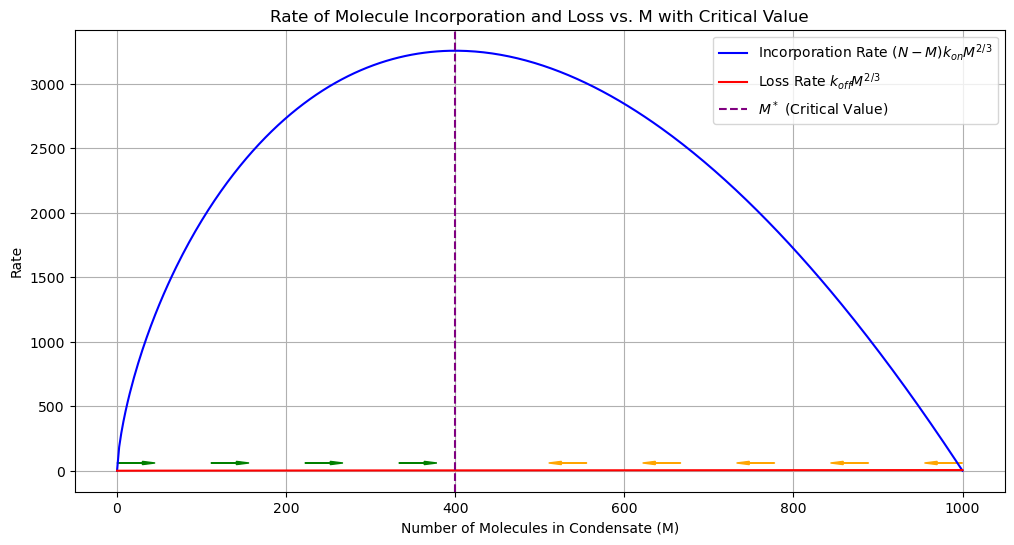

(None, 400)

In [9]:
# Adjusting the code to avoid overlapping arrows and to correctly position the critical value M* = 390

# Recalculate the rates to ensure accuracy
incorporation_rate_updated = k_on * M**(2/3) * (N - M)
loss_rate_updated = k_off * M**(2/3)

# Plotting with modifications
plt.figure(figsize=(12, 6))

# Incorporation and loss rates
plt.plot(M, incorporation_rate_updated, label='Incorporation Rate $(N-M)k_{on}M^{2/3}$', color='blue')
plt.plot(M, loss_rate_updated, label='Loss Rate $k_{off}M^{2/3}$', color='red')

# Critical value line (M*)
plt.axvline(x=M_star, color='purple', linestyle='--', label='$M^*$ (Critical Value)')

# Placing arrows more strategically to avoid overlap and ensure clarity
arrow_positions = np.linspace(0, N, 10)  # More even distribution across the entire range
arrow_head_length = 15
arrow_head_width = 25

# Adjusting arrow direction based on M* and avoiding overlap by calculating positions
for pos in arrow_positions:
    if pos < M_star:
        # Arrows pointing towards M*
        if pos < M_star - 50 or pos > M_star - 30:  # Avoid placing an arrow too close to M*
            plt.arrow(pos, 60, 30, 0, head_width=arrow_head_width, head_length=arrow_head_length, fc='green', ec='green')
    elif pos > M_star:
        # Arrows pointing away from M*
        if pos < M_star + 30 or pos > M_star + 50:  # Avoid placing an arrow too close to M*
            plt.arrow(pos, 60, -30, 0, head_width=arrow_head_width, head_length=arrow_head_length, fc='orange', ec='orange')

plt.title('Rate of Molecule Incorporation and Loss vs. M with Critical Value')
plt.xlabel('Number of Molecules in Condensate (M)')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show(), M_star


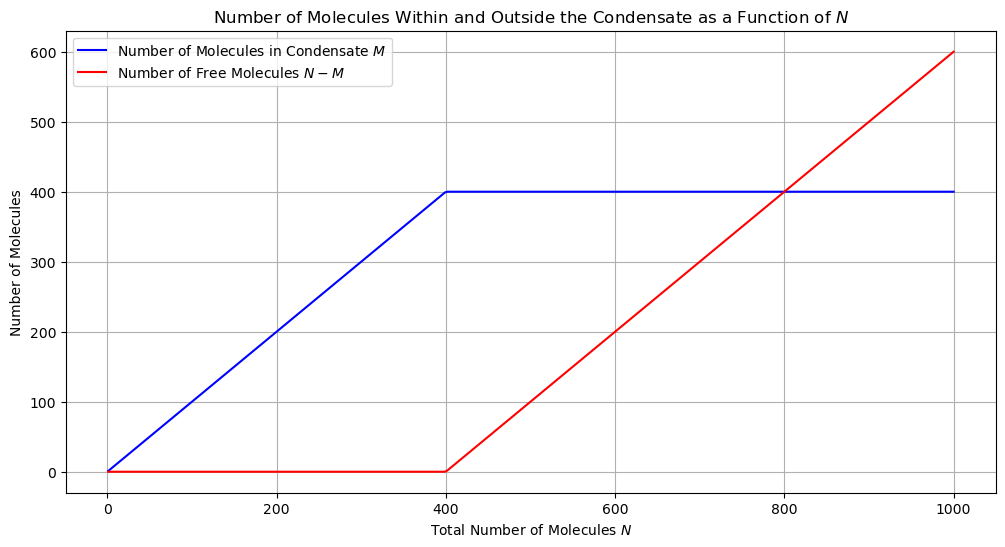

In [14]:
# Redefining the relationship between M and N under phase separation without specifying M*
# Assuming a simplified model where M increases with N until a certain saturation or system dynamic limit

N_values = np.linspace(1, 1000, 400)
# For this simplified model, let's assume M increases linearly with N up to a certain point

# Assuming M increases linearly with N up to a saturation point, after which it increases more slowly
# This is a simplistic approach to model the beginning of phase separation without specific dynamics
saturation_point = 400  # An arbitrary saturation point for illustration

# Calculate M and N - M under the new assumptions
M_values_new = np.minimum(N_values, saturation_point)
free_molecules_new = N_values - M_values_new

# Plotting the new relationship
plt.figure(figsize=(12, 6))

# M as a function of N
plt.plot(N_values, M_values_new, label='Number of Molecules in Condensate $M$', color='blue')

# N - M as a function of N
plt.plot(N_values, free_molecules_new, label='Number of Free Molecules $N - M$', color='red')

plt.title('Number of Molecules Within and Outside the Condensate as a Function of $N$')
plt.xlabel('Total Number of Molecules $N$')
plt.ylabel('Number of Molecules')
plt.legend()
plt.grid(True)
plt.show()


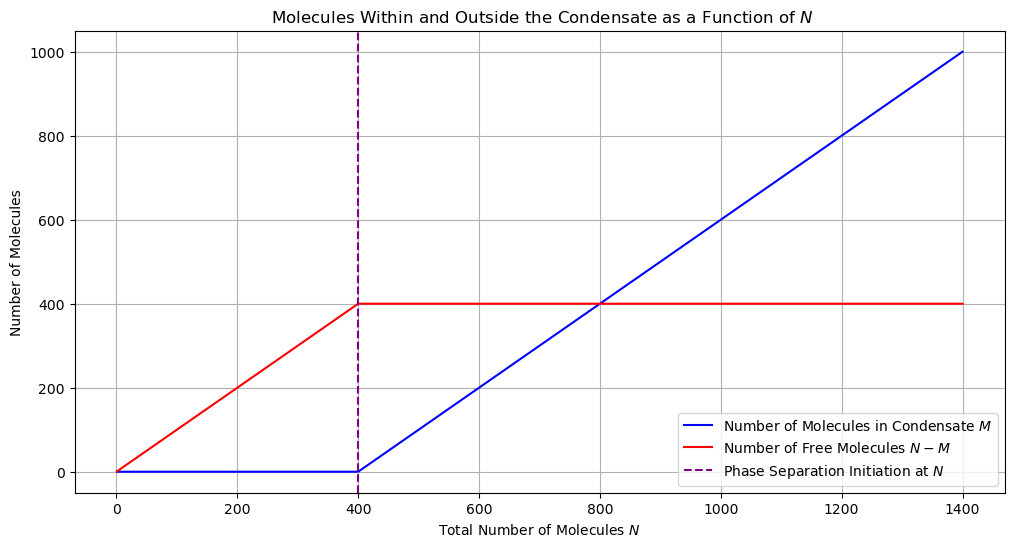

In [19]:
# Correcting the logic based on the understanding of phase separation initiation
# Before phase separation, all molecules are free. After the initiation of phase separation, M starts to increase.
N_values = np.linspace(1, 1400, 400)

# We assume phase separation begins at a certain N value, let's define this as a threshold
threshold_N = 400  # Assuming phase separation begins at N = 500 for illustration

# Calculate M and N - M under correct logic
M_values_corrected = np.maximum(0, N_values - threshold_N)
free_molecules_corrected = N_values - M_values_corrected

# Plotting the corrected relationship
plt.figure(figsize=(12, 6))

# M as a function of N
plt.plot(N_values, M_values_corrected, label='Number of Molecules in Condensate $M$', color='blue')

# N - M as a function of N
plt.plot(N_values, free_molecules_corrected, label='Number of Free Molecules $N - M$', color='red')

# Highlighting phase separation initiation
plt.axvline(x=threshold_N, color='purple', linestyle='--', label='Phase Separation Initiation at $N$')

plt.title(' Molecules Within and Outside the Condensate as a Function of $N$')
plt.xlabel('Total Number of Molecules $N$')
plt.ylabel('Number of Molecules')
plt.legend()
plt.grid(True)
plt.show()


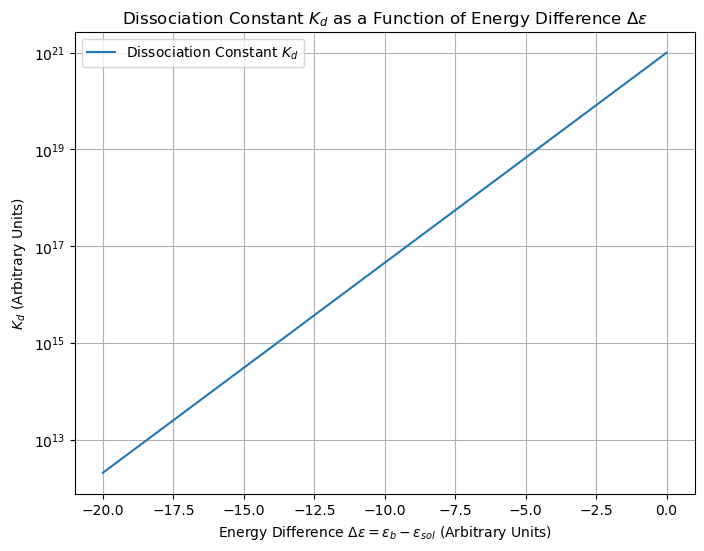

In [22]:
# We'll plot the dissociation constant K_d as a function of Delta epsilon.

# Setting constants for the plot
v = 1e-21  # volume in liters (a typical small value for illustration)
beta = 1  # We'll just set beta to 1 for simplicity. Normally, beta = 1/(kT).

# Let's choose a range for Delta epsilon from -20 to 0 (in arbitrary units)
Delta_epsilons = np.linspace(-20, 0, 100)

# Calculating K_d values across the range of Delta epsilon
# Note: Normally we would use the actual values for beta and v, but here we are using arbitrary units
K_d_values = [1 / (v * np.exp(-beta * delta_epsilon)) for delta_epsilon in Delta_epsilons]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Delta_epsilons, K_d_values, label='Dissociation Constant $K_d$')
plt.xlabel('Energy Difference $\Delta \epsilon = \epsilon_b - \epsilon_{sol}$ (Arbitrary Units)')
plt.ylabel('$K_d$ (Arbitrary Units)')
plt.title('Dissociation Constant $K_d$ as a Function of Energy Difference $\Delta \epsilon$')
plt.yscale('log')  # Logarithmic scale for better visualization
plt.legend()
plt.grid(True)
plt.show()


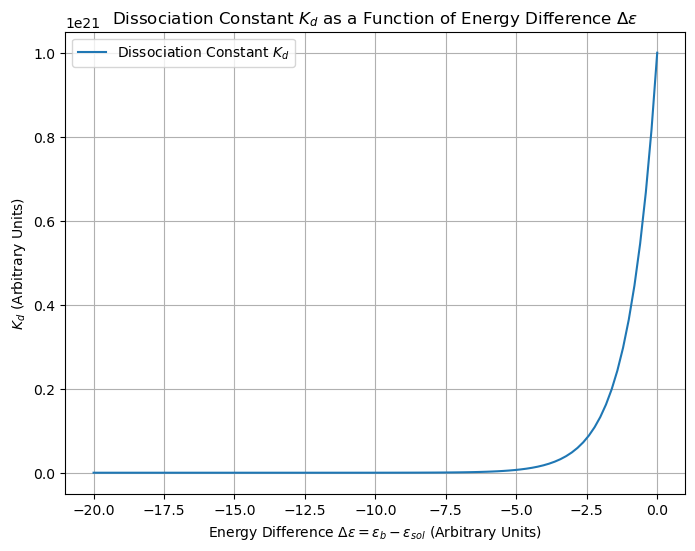

In [23]:
# We'll attempt to plot the dissociation constant K_d as a function of Delta epsilon without using a logarithmic scale.

import numpy as np
import matplotlib.pyplot as plt

# Setting constants for the plot
v = 1e-21  # volume in liters (a typical small value for illustration)
beta = 1  # We'll just set beta to 1 for simplicity. Normally, beta = 1/(kT).

# Let's choose a range for Delta epsilon from -20 to 0 (in arbitrary units)
Delta_epsilons = np.linspace(-20, 0, 100)

# Calculating K_d values across the range of Delta epsilon
# Note: Normally we would use the actual values for beta and v, but here we are using arbitrary units
K_d_values = [1 / (v * np.exp(-beta * delta_epsilon)) for delta_epsilon in Delta_epsilons]

# Plotting without a logarithmic scale
plt.figure(figsize=(8, 6))
plt.plot(Delta_epsilons, K_d_values, label='Dissociation Constant $K_d$')
plt.xlabel('Energy Difference $\Delta \epsilon = \epsilon_b - \epsilon_{sol}$ (Arbitrary Units)')
plt.ylabel('$K_d$ (Arbitrary Units)')
plt.title('Dissociation Constant $K_d$ as a Function of Energy Difference $\Delta \epsilon$')
plt.legend()
plt.grid(True)
plt.show()


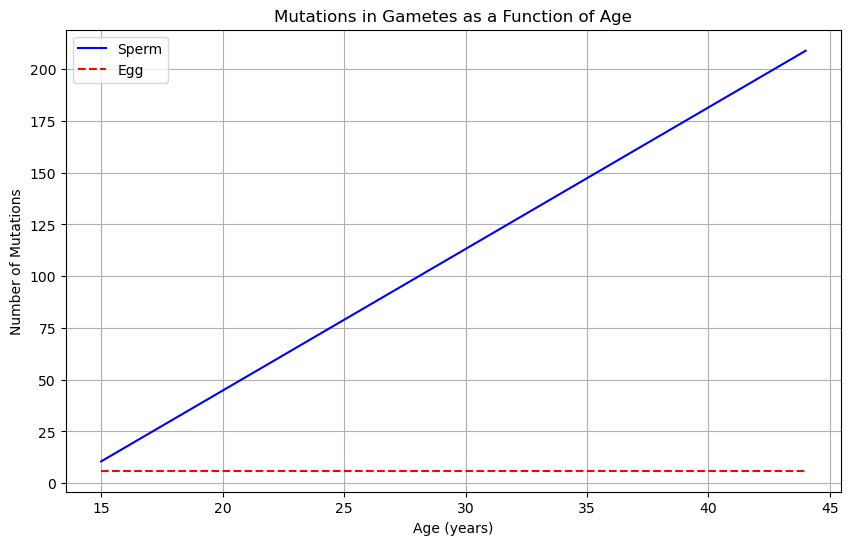

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
genome_length = 3e9  # human genome length in basepairs
replication_error_rate = 1e-10  # error rate per basepair per replication
expected_mutations_per_replication = genome_length * replication_error_rate
puberty_age = 15  # age at puberty
base_genome_replications_sperm = 35  # base number of genome replications for sperm formation (34 mitosis + 1 meiosis)
stem_cell_division_days = 16  # days for stem cell division cycle
expected_mutations_egg = 23 * expected_mutations_per_replication  # mutations in egg

# Age range from puberty to 50 years for plotting
ages = np.arange(puberty_age, 45)

# Sperm mutations calculation
base_mutations_sperm = base_genome_replications_sperm * expected_mutations_per_replication
additional_mutations_per_year = (365 / stem_cell_division_days) * expected_mutations_per_replication
mutations_sperm = base_mutations_sperm + additional_mutations_per_year * (ages - puberty_age)

# Egg mutations are constant across ages
mutations_egg = np.full_like(ages, expected_mutations_egg)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ages, mutations_sperm, label='Sperm', color='blue')
plt.plot(ages, mutations_egg, label='Egg', color='red', linestyle='--')
plt.xlabel('Age (years)')
plt.ylabel('Number of Mutations')
plt.title('Mutations in Gametes as a Function of Age')
plt.legend()
plt.grid(True)
plt.show()


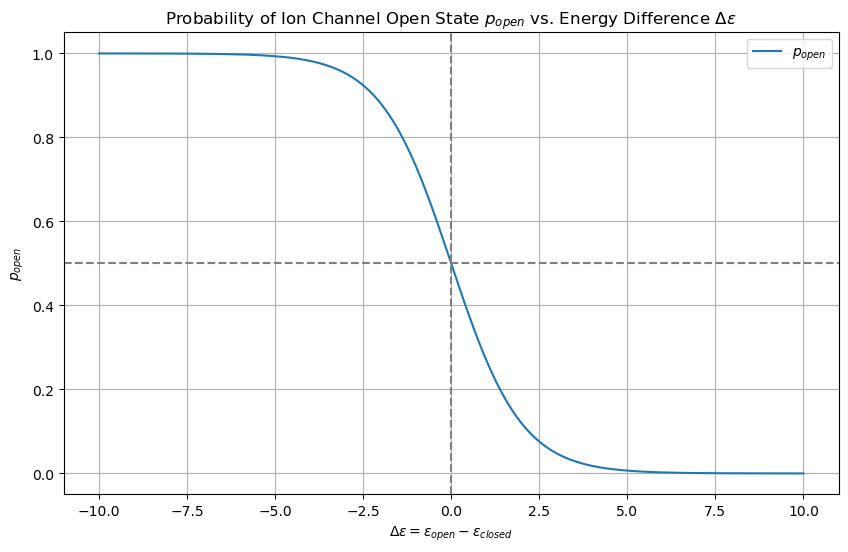

In [28]:
# Constants for the plot
beta = 1  # Again, we use beta = 1 for simplicity.

# Delta_epsilon values for plotting
delta_epsilon_values = np.linspace(-10, 10, 200)

# Calculate p_open for each value of delta_epsilon
p_open_values = 1 / (1 + np.exp(beta * delta_epsilon_values))

# Plotting p_open versus delta_epsilon
plt.figure(figsize=(10, 6))
plt.plot(delta_epsilon_values, p_open_values, label=r'$p_{open}$')
plt.xlabel(r'$\Delta \epsilon = \epsilon_{open} - \epsilon_{closed}$')
plt.ylabel(r'$p_{open}$')
plt.title('Probability of Ion Channel Open State $p_{open}$ vs. Energy Difference $\Delta \epsilon$')
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


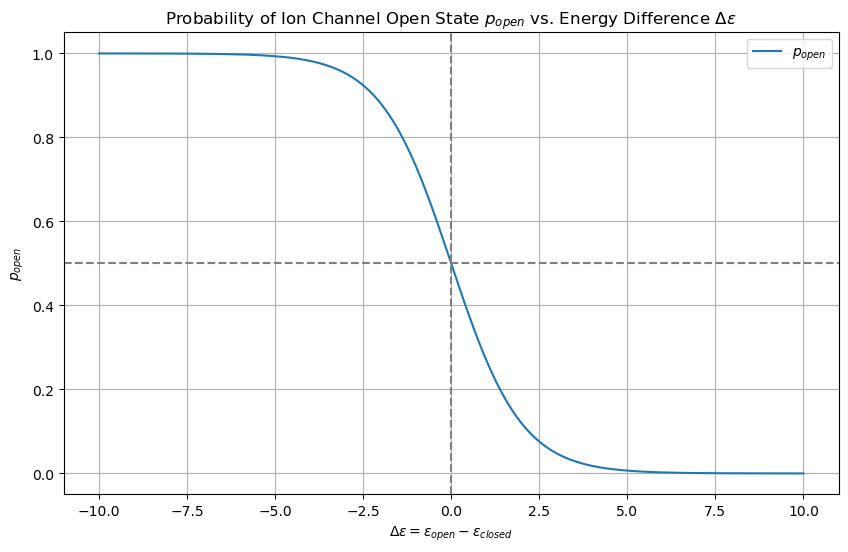

In [30]:
# Constants for the plot
beta = 1  # Again, we use beta = 1 for simplicity.

# Delta_epsilon values for plotting
delta_epsilon_values = np.linspace(-10, 10, 200)

# Calculate p_open for each value of delta_epsilon
p_open_values = 1 / (1 + np.exp(beta * delta_epsilon_values))

# Plotting p_open versus delta_epsilon
plt.figure(figsize=(10, 6))
plt.plot(delta_epsilon_values, p_open_values, label=r'$p_{open}$')
plt.xlabel(r'$\Delta \epsilon = \epsilon_{open} - \epsilon_{closed}$')
plt.ylabel(r'$p_{open}$')
plt.title('Probability of Ion Channel Open State $p_{open}$ vs. Energy Difference $\Delta \epsilon$')
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


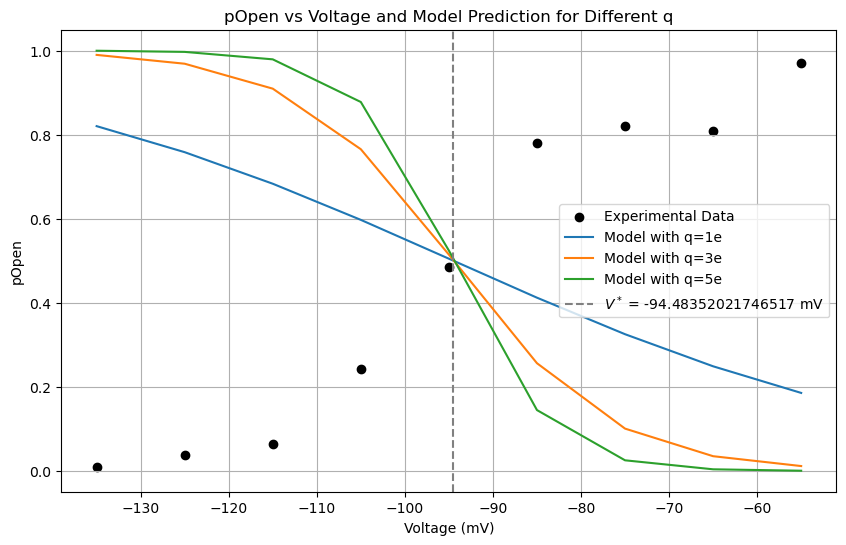

-94.48352021746517

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = pd.DataFrame({
    'Voltage (mV)': [-135, -125, -115, -105, -95, -85, -75, -65, -55],
    'pOpen': [0.0106, 0.0371, 0.0651, 0.2431, 0.4848, 0.7791, 0.8207, 0.8087, 0.9694]
})

# Since we are assuming that at pOpen = 0.5, V = V*, we can interpolate to find V*
v_half_activation = np.interp(0.5, data['pOpen'], data['Voltage (mV)'])

# Constants
beta = 1/(1.38e-23 * 310)  # Assuming body temperature of 37 degrees Celsius
q_electron = 1.602e-19  # Charge of an electron in coulombs
# Convert mV to V for calculation
voltages_V = data['Voltage (mV)'] * 1e-3

# Model prediction for different q values
qs = [1, 3, 5]  # q in units of electron charge

# Prepare plot
plt.figure(figsize=(10, 6))

# Plot experimental data
plt.scatter(data['Voltage (mV)'], data['pOpen'], color='black', label='Experimental Data')

# Plot model prediction
for q in qs:
    q_value = q * q_electron
    p_open_model = 1 / (1 + np.exp(beta * q_value * (voltages_V - v_half_activation * 1e-3)))
    plt.plot(data['Voltage (mV)'], p_open_model, label=f'Model with q={q}e')

plt.axvline(x=v_half_activation, color='grey', linestyle='--', label=f'$V^*$ = {v_half_activation} mV')

plt.xlabel('Voltage (mV)')
plt.ylabel('pOpen')
plt.title('pOpen vs Voltage and Model Prediction for Different q')
plt.legend()
plt.grid(True)
plt.show()

v_half_activation


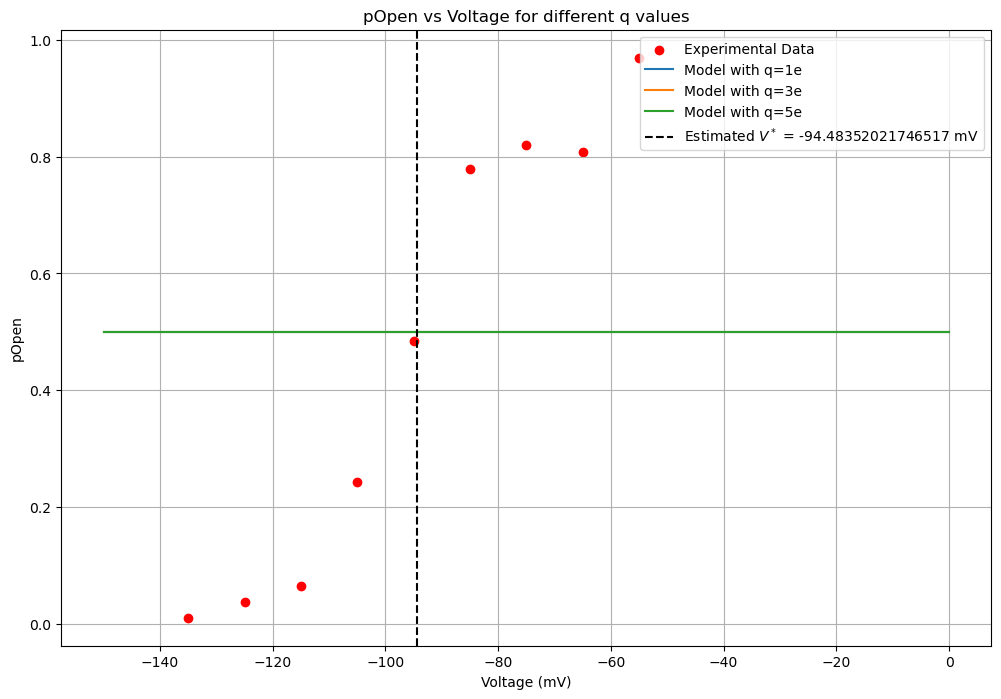

-94.48352021746517

In [32]:
# Given the data directly, we can proceed to estimate V* by finding the voltage value at which pOpen is 0.5
# Since this is not a linear relationship, we can interpolate between the data points to estimate V*

# Data from the table
voltage_mV = np.array([-135, -125, -115, -105, -95, -85, -75, -65, -55])
p_open_data = np.array([0.0106, 0.0371, 0.0651, 0.2431, 0.4848, 0.7791, 0.8207, 0.8087, 0.9694])

# Interpolating to find V* where p_open is 0.5
V_star = np.interp(0.5, p_open_data, voltage_mV)

# Now we will calculate p_open as a function of V for three different q values (1e, 3e, 5e)
# q is in units of the elementary charge (e)
e_charge = 1.602e-19  # Charge of an electron in Coulombs
beta = 1  # Assume beta = 1 for simplicity

# Model prediction function for p_open
def p_open_model(V, V_star, q, beta):
    return 1 / (1 + np.exp(beta * q * e_charge * (V - V_star)))

# Voltage range for the model prediction
voltage_range = np.linspace(-150, 0, 300)  # mV

# Plotting the data and model predictions
plt.figure(figsize=(12, 8))

# Plot the experimental data
plt.scatter(voltage_mV, p_open_data, color='red', label='Experimental Data')

# Plot model predictions for q = 1e, 3e, 5e
for q in [1, 3, 5]:
    plt.plot(voltage_range, p_open_model(voltage_range * 1e-3, V_star * 1e-3, q, beta),
             label=f'Model with q={q}e')

plt.xlabel('Voltage (mV)')
plt.ylabel('pOpen')
plt.title('pOpen vs Voltage for different q values')
plt.axvline(x=V_star, color='black', linestyle='--', label=f'Estimated $V^*$ = {V_star} mV')
plt.legend()
plt.grid(True)
plt.show()

# Output the estimated V_star
V_star


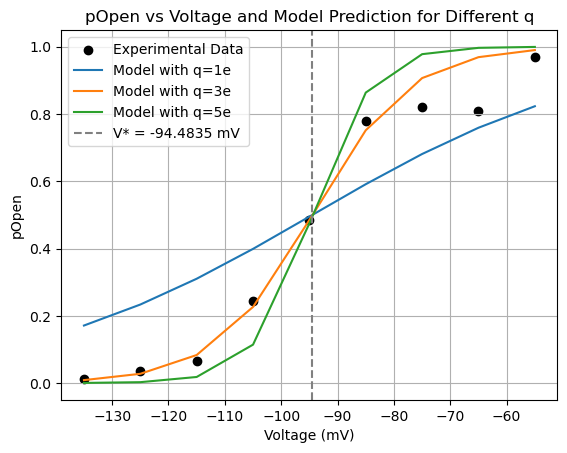

In [33]:
# Correct the expression for p_open to reflect the increase in opening probability with increased voltage

# Define the function for p_open with corrected q sign
def p_open_corrected(V, V_star, q, beta):
    return 1 / (1 + np.exp(-beta * q * (V - V_star)))

# Define the charge of an electron
e_charge = 1.602e-19  # Charge of an electron in Coulombs

# Define beta, assuming room temperature for simplicity (actual beta should be 1/(kT))
k = 1.38e-23  # Boltzmann constant
T = 298  # Temperature in Kelvin
beta = 1 / (k * T)

# Use the interpolated V_star from the experimental data
V_star = -94.4835  # mV

# Experimental data
voltage_mV = np.array([-135, -125, -115, -105, -95, -85, -75, -65, -55])
p_open_data = np.array([0.0106, 0.0371, 0.0651, 0.2431, 0.4848, 0.7791, 0.8207, 0.8087, 0.9694])

# Convert voltage from mV to V for the calculation
voltages_V = voltage_mV * 1e-3

# Plot the experimental data
plt.scatter(voltage_mV, p_open_data, color='black', label='Experimental Data')

# Plot model predictions for different absolute values of q
for q in [1, 3, 5]:
    q_value = q * e_charge  # Convert q to Coulombs
    plt.plot(voltage_mV, p_open_corrected(voltages_V, V_star * 1e-3, q_value, beta),
             label=f'Model with q={q}e')

# Adding labels and title
plt.xlabel('Voltage (mV)')
plt.ylabel('pOpen')
plt.title('pOpen vs Voltage and Model Prediction for Different q')
plt.axvline(x=V_star, color='grey', linestyle='--', label=f'V* = {V_star} mV')
plt.legend()
plt.grid(True)
plt.show()
